In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data1.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,cost
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,220.0464
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,512.3580
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,7.7486
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,1340.6085
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,19.8516
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,258.6960,3,0.20,194.0220
1219,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Phones,1931.9580,7,0.40,2318.3496
1220,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Office Supplies,Storage,249.7500,9,0.00,204.7950
1221,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Technology,Phones,255.9360,8,0.20,227.1432


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     1223 non-null   object 
 1   Segment       1223 non-null   object 
 2   Country       1223 non-null   object 
 3   City          1223 non-null   object 
 4   State         1223 non-null   object 
 5   Postal Code   1223 non-null   int64  
 6   Region        1223 non-null   object 
 7   Category      1223 non-null   object 
 8   Sub-Category  1223 non-null   object 
 9   Sales         1223 non-null   float64
 10  Quantity      1223 non-null   int64  
 11  Discount      1223 non-null   float64
 12  cost          1223 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 124.3+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
cost            0
dtype: int64

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df['Profit'] = (df['Sales'] - df['cost'])

df['Profit_discount'] = ((df['Profit'] - df['Discount']))

df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,cost,Profit,Profit_discount
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,220.0464,41.9136,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,512.3580,219.5820,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,7.7486,6.8714,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,1340.6085,-383.0310,-383.4810
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,19.8516,2.5164,2.3164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,258.6960,3,0.20,194.0220,64.6740,64.4740
1219,Standard Class,Corporate,United States,Philadelphia,Pennsylvania,19134,East,Technology,Phones,1931.9580,7,0.40,2318.3496,-386.3916,-386.7916
1220,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Office Supplies,Storage,249.7500,9,0.00,204.7950,44.9550,44.9550
1221,Standard Class,Home Office,United States,Los Angeles,California,90036,West,Technology,Phones,255.9360,8,0.20,227.1432,28.7928,28.5928


In [7]:
pd.DataFrame(df.nunique())

,0
Ship Mode,4
Segment,3
Country,1
City,198
State,41
Postal Code,249
Region,4
Category,3
Sub-Category,17
Sales,1088


In [8]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

df['Ship Mode_']= label_encoder.fit_transform(df['Ship Mode'])
  
df['Ship Mode_'].unique()

array([2, 3, 0, 1])

In [9]:
label_encoder = preprocessing.LabelEncoder()

df['Segment_']= label_encoder.fit_transform(df['Segment'])
  
df['Segment_'].unique()

array([0, 1, 2])

In [10]:
label_encoder = preprocessing.LabelEncoder()

df['Country_']= label_encoder.fit_transform(df['Country'])
  
df['Country_'].unique()

array([0])

In [11]:
label_encoder = preprocessing.LabelEncoder()

df['City_']= label_encoder.fit_transform(df['City'])
  
df['City_'].unique()

array([ 73, 101,  57,  33, 172,  58, 104, 192, 167,  60, 141, 133,  77,
       148, 121, 108,  47, 194,  44, 122, 125, 181,  26,  63, 174,  82,
       109,  40,  46,  31, 151, 113, 144, 160,  10,  24, 134, 184,  32,
        17, 196,  13, 142, 155,  80, 138, 126,  59, 171, 168,  48,  21,
       165, 115,  53,  65, 146,  70, 193,   0,  41,  38, 195, 159, 107,
        45,  43, 176, 170,  89, 166,  16,  23, 117,  27,  81, 175,  30,
        12, 177,  90,   5,   6,  69, 162,  99,  74, 119,  96,  11, 103,
       105,  71, 182, 145, 139,  42, 140,  94, 189, 111,  78, 149, 102,
        95,  20, 124,  62,  83,   9, 127, 136,   2,  98,  79,  55,  35,
       137,   8,  64,  66,  88, 116, 110,  67,   3, 106, 163,  93,  68,
        39, 188, 185, 114, 152, 143, 173, 186,  28, 183,  19, 191,  25,
        22, 135, 118,  75, 130,  52, 180,  36,  15,  91,   7,  87, 132,
        49, 169, 112,  56, 100,  97, 164, 123,  61, 128,   1, 178,  54,
       150, 179, 157,  14, 187, 120, 131, 190,  84, 161, 153,  1

In [12]:
label_encoder = preprocessing.LabelEncoder()

df['State_']= label_encoder.fit_transform(df['State'])

df['State_'].unique()

array([13,  3,  8, 28, 39, 36, 40, 37, 22, 32, 10, 18, 17,  6, 11, 27,  1,
       38, 35,  0, 34, 31,  4, 12, 29, 20, 30, 26, 14,  5, 25, 16,  9, 23,
       33, 19,  2, 21, 24, 15,  7])

In [13]:
label_encoder = preprocessing.LabelEncoder()

df['Region_']= label_encoder.fit_transform(df['Region'])
  
df['Region_'].unique()

array([2, 3, 0, 1])

In [14]:
label_encoder = preprocessing.LabelEncoder()

df['Category_']= label_encoder.fit_transform(df['Category'])
  
df['Category_'].unique()

array([0, 1, 2])

In [15]:
label_encoder = preprocessing.LabelEncoder()

df['Sub-Category_']= label_encoder.fit_transform(df['Sub-Category'])
  
df['Sub-Category_'].unique()

array([ 4,  5, 10, 16, 14,  9,  2, 13,  3,  1, 12,  0,  7,  8, 15, 11,  6])

In [16]:
df = df[['Ship Mode', 'Ship Mode_', 'Segment', 'Segment_', 'City', 'City_','Country', 'Country_',
        'State', 'State_', 'Postal Code', 'Region', 'Region_','Category', 'Category_',
         'Sub-Category', 'Sub-Category_', 'Sales', 'Quantity', 'Discount', 'cost', 'Profit', 'Profit_discount']]
df

,Ship Mode,Ship Mode_,Segment,Segment_,City,City_,Country,Country_,State,State_,...,Category,Category_,Sub-Category,Sub-Category_,Sales,Quantity,Discount,cost,Profit,Profit_discount
0,Second Class,2,Consumer,0,Henderson,73,United States,0,Kentucky,13,...,Furniture,0,Bookcases,4,261.9600,2,0.00,220.0464,41.9136,41.9136
1,Second Class,2,Consumer,0,Henderson,73,United States,0,Kentucky,13,...,Furniture,0,Chairs,5,731.9400,3,0.00,512.3580,219.5820,219.5820
2,Second Class,2,Corporate,1,Los Angeles,101,United States,0,California,3,...,Office Supplies,1,Labels,10,14.6200,2,0.00,7.7486,6.8714,6.8714
3,Standard Class,3,Consumer,0,Fort Lauderdale,57,United States,0,Florida,8,...,Furniture,0,Tables,16,957.5775,5,0.45,1340.6085,-383.0310,-383.4810
4,Standard Class,3,Consumer,0,Fort Lauderdale,57,United States,0,Florida,8,...,Office Supplies,1,Storage,14,22.3680,2,0.20,19.8516,2.5164,2.3164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Standard Class,3,Corporate,1,Philadelphia,141,United States,0,Pennsylvania,32,...,Technology,2,Accessories,0,258.6960,3,0.20,194.0220,64.6740,64.4740
1219,Standard Class,3,Corporate,1,Philadelphia,141,United States,0,Pennsylvania,32,...,Technology,2,Phones,13,1931.9580,7,0.40,2318.3496,-386.3916,-386.7916
1220,Standard Class,3,Home Office,2,Los Angeles,101,United States,0,California,3,...,Office Supplies,1,Storage,14,249.7500,9,0.00,204.7950,44.9550,44.9550
1221,Standard Class,3,Home Office,2,Los Angeles,101,United States,0,California,3,...,Technology,2,Phones,13,255.9360,8,0.20,227.1432,28.7928,28.5928


In [17]:
normalize_counts_of_states = df['State'].value_counts(normalize=True)
normalize_counts_of_states


California              0.184124
New York                0.137480
Texas                   0.088380
Pennsylvania            0.076923
Ohio                    0.054828
Illinois                0.046645
Washington              0.042553
Michigan                0.041735
Florida                 0.040098
Colorado                0.033552
North Carolina          0.026187
Arizona                 0.022913
Virginia                0.020458
New Jersey              0.018822
Minnesota               0.018822
Kentucky                0.014730
Indiana                 0.014730
Georgia                 0.009820
Tennessee               0.008183
Wisconsin               0.008183
Iowa                    0.008183
Louisiana               0.007365
Oregon                  0.007365
Massachusetts           0.006547
Arkansas                0.006547
Delaware                0.006547
Mississippi             0.004910
Connecticut             0.004910
Maryland                0.004092
New Hampshire           0.004092
Utah      

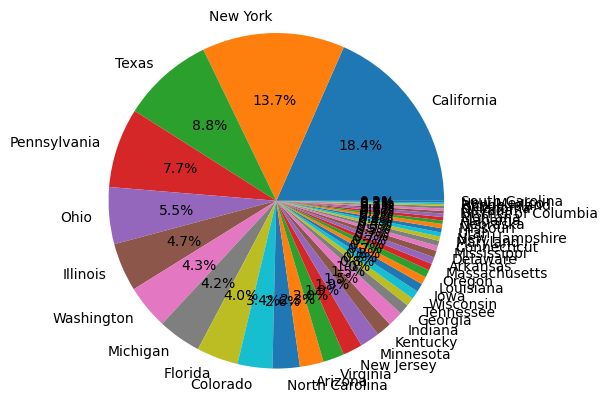

In [18]:
fig1, ax1 = plt.subplots()
ax1.pie (normalize_counts_of_states, autopct='%1.1f%%' ,labels = normalize_counts_of_states.keys())
ax1.axis('equal')

plt.show()

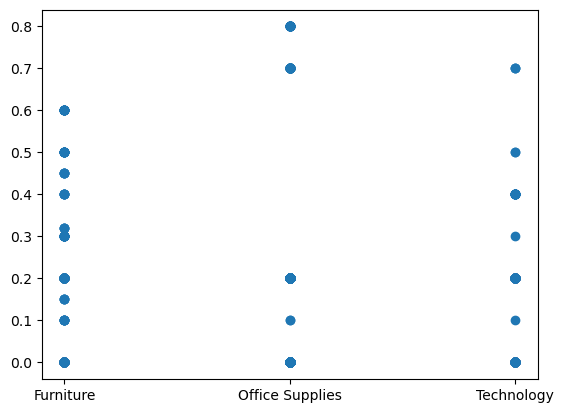

In [19]:
x=df["Category"]
y=df["Discount"]

plt.scatter(x,y)

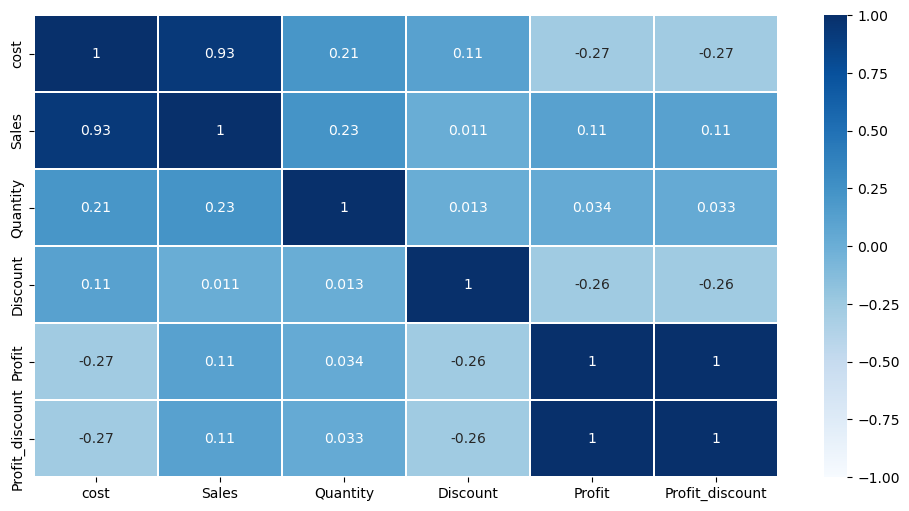

In [20]:
correlation = df[['cost','Sales','Quantity','Discount','Profit','Profit_discount']].corr()

plt.figure(figsize = (12,6))

sns.heatmap(correlation, vmin=-1, vmax=1, cmap="Blues", annot=True, linewidth = 0.1 )

plt.show()

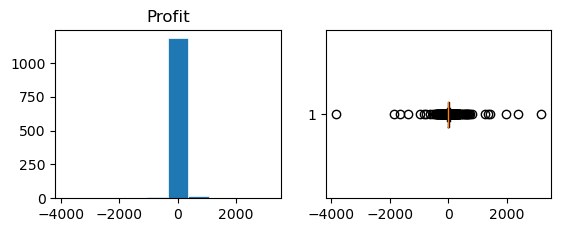

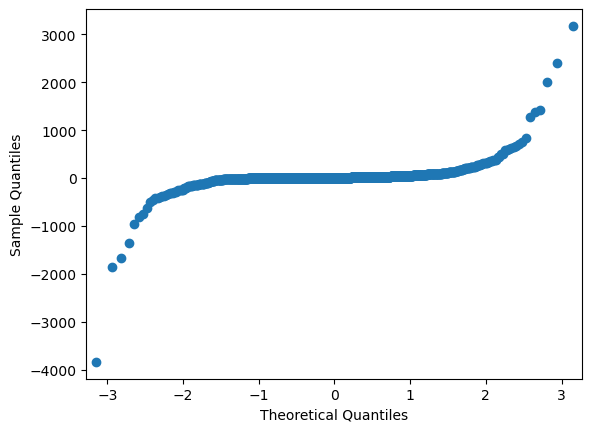

In [21]:
x = df['Profit']

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Profit')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()

In [22]:
for i in range (1):
    temp = df.loc[(df['City_'] == i )]
    name = str(temp['City'].unique())+ ".csv"
#     temp.to_csv(name)

In [23]:
df1 = pd.DataFrame(df.groupby(['Category'])[['Sales']].sum())
df1

,Sales
Category,
Furniture,98239.4719
Office Supplies,79194.6120
Technology,114948.3480


In [24]:
df2 = df[['Category','Category_' ,'Sales']]

for i in range (3):
    temp = df2.loc[(df['Category_'] == i )]
    name = str(temp['Category'].unique())+ ".csv"
    temp.to_csv(name)

In [25]:
df3 = pd.read_csv("['Office Supplies'].csv")
df3

,Unnamed: 0,Category,Category_,Sales
0,2,Office Supplies,1,14.620
1,4,Office Supplies,1,22.368
2,6,Office Supplies,1,7.280
3,8,Office Supplies,1,18.504
4,9,Office Supplies,1,114.900
...,...,...,...,...
736,1210,Office Supplies,1,8.544
737,1213,Office Supplies,1,3.036
738,1214,Office Supplies,1,4.503
739,1215,Office Supplies,1,4.672


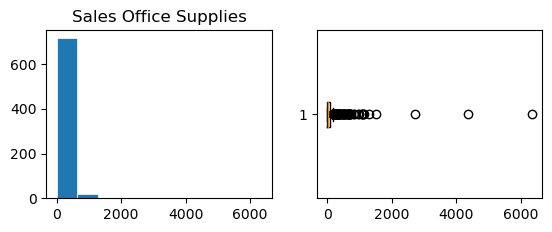

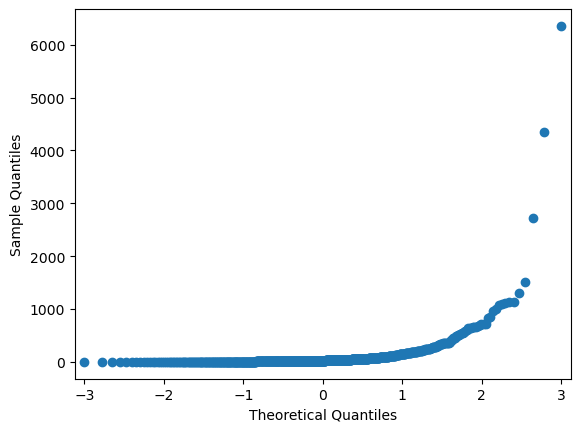

In [26]:
x = df3['Sales']

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Sales Office Supplies')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()

In [27]:
df4 = pd.read_csv("['Technology'].csv")
df4

,Unnamed: 0,Category,Category_,Sales
0,7,Technology,2,907.152
1,11,Technology,2,911.424
2,19,Technology,2,213.480
3,26,Technology,2,90.570
4,35,Technology,2,1097.544
...,...,...,...,...
223,1205,Technology,2,271.960
224,1216,Technology,2,95.880
225,1218,Technology,2,258.696
226,1219,Technology,2,1931.958


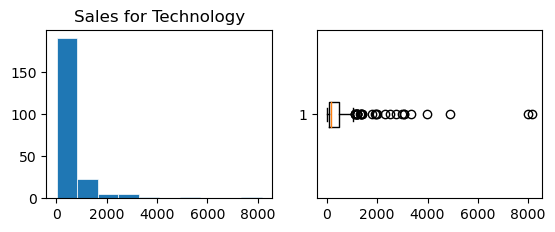

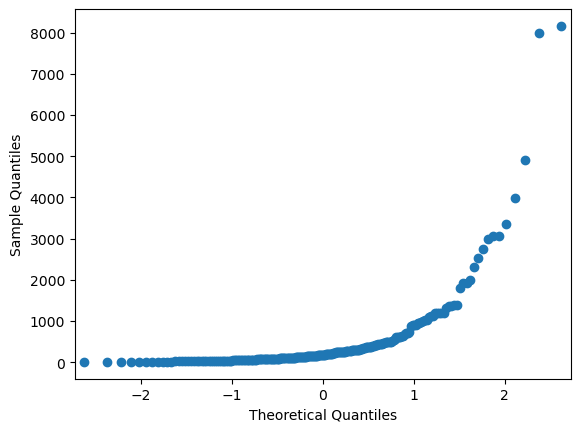

In [28]:
x = df4['Sales']

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Sales for Technology')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()

In [29]:
df5 = pd.read_csv("['Furniture'].csv")
df5

,Unnamed: 0,Category,Category_,Sales
0,0,Furniture,0,261.9600
1,1,Furniture,0,731.9400
2,3,Furniture,0,957.5775
3,5,Furniture,0,48.8600
4,10,Furniture,0,1706.1840
...,...,...,...,...
248,1202,Furniture,0,854.3520
249,1211,Furniture,0,579.1360
250,1212,Furniture,0,141.3720
251,1217,Furniture,0,17.0240


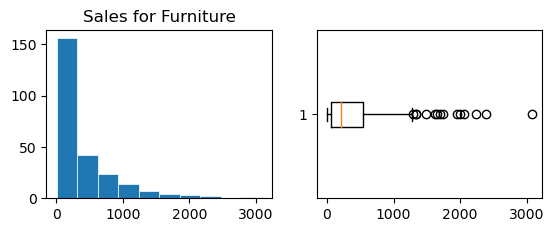

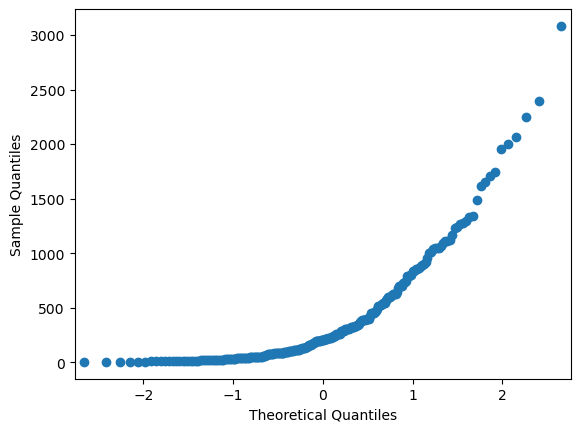

In [30]:
x = df5['Sales']

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Sales for Furniture')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()

In [31]:
extract1 = pd.DataFrame(df.groupby(['Ship Mode', 'Sub-Category'])['Profit'].sum())
extract1.sort_values('Profit', ascending = False)

pd.set_option('display.max_rows', 66)

extract1

Profit
Ship Mode      Sub-Category           
First Class    Accessories    903.9277
               Appliances     175.1657
               Art            106.5532
               Binders        704.4495
               Bookcases       18.6334
               Chairs         -75.7694
               Copiers        374.9925
               Envelopes      298.1871
               Fasteners       22.9972
               Furnishings    131.4363
               Labels         159.7076
               Machines       326.1013
               Paper          816.6038
               Phones         724.2225
               Storage        375.6335
               Supplies         4.3122
               Tables         418.1872
Same Day       Accessories   1413.4267
               Appliances     121.9970
               Art              5.9312
               Binders         10.9572
               Bookcases      271.4192
               Chairs         -50.0980
               Copiers        209.9930
               Fasteners        7.8906
               Furnishings     59.8656
               Machines     -3839.9904
               Paper           17.8848
               Phones          85.6855
               Storage         46.1435
               Supplies         0.1472
               Tables        -319.2312
Second Class   Accessories    754.3175
               Appliances     315.8937
               Art            146.2672
               Binders       -475.0544
               Bookcases     -229.7562
               Chairs        1915.7225
               Copiers       1037.9827
               Envelopes      210.9624
               Fasteners       40.5163
               Furnishings    -17.7935
               Labels         145.6522
               Machines      -718.7937
               Paper          673.7985
               Phones        1283.4633
               Storage        785.0886
               Supplies      -205.9098
               Tables         140.5874
Standard Class Accessories   3529.8807
               Appliances     481.5422
               Art            630.4743
               Binders       2968.7811
               Bookcases    -1932.6716
               Chairs        2116.0076
               Copiers       2249.9596
               Envelopes      571.3712
               Fasteners      102.3758
               Furnishings    982.2881
               Labels         366.8749
               Machines      2553.9106
               Paper         1854.1545
               Phones        2543.7687
               Storage       1120.5258
               Supplies       -96.8747
               Tables       -3064.1031

In [32]:
dfnew = df[['Ship Mode', 'Sub-Category', 'Sales','Profit']]

for i in range (4):
    temp = dfnew.loc[(df['Ship Mode_'] == i )]
    name = str(temp['Ship Mode'].unique())+ ".csv"
    temp.to_csv(name)

<AxesSubplot:xlabel='Sub-Category'>

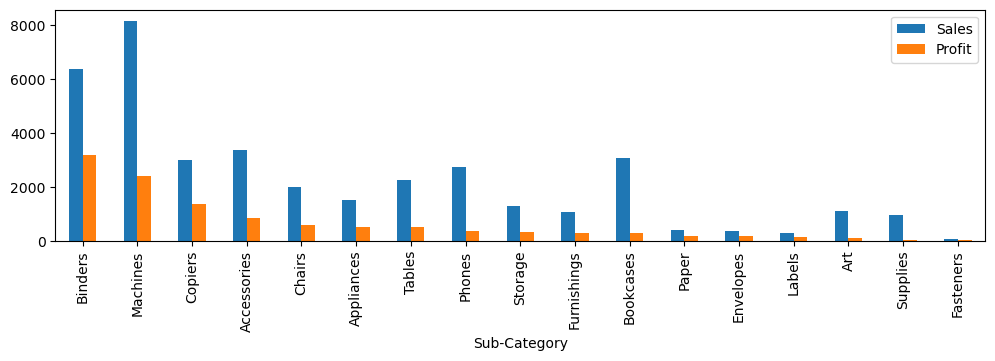

In [33]:
x = dfnew.groupby(['Sub-Category'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (12,3))

<AxesSubplot:xlabel='Sub-Category'>

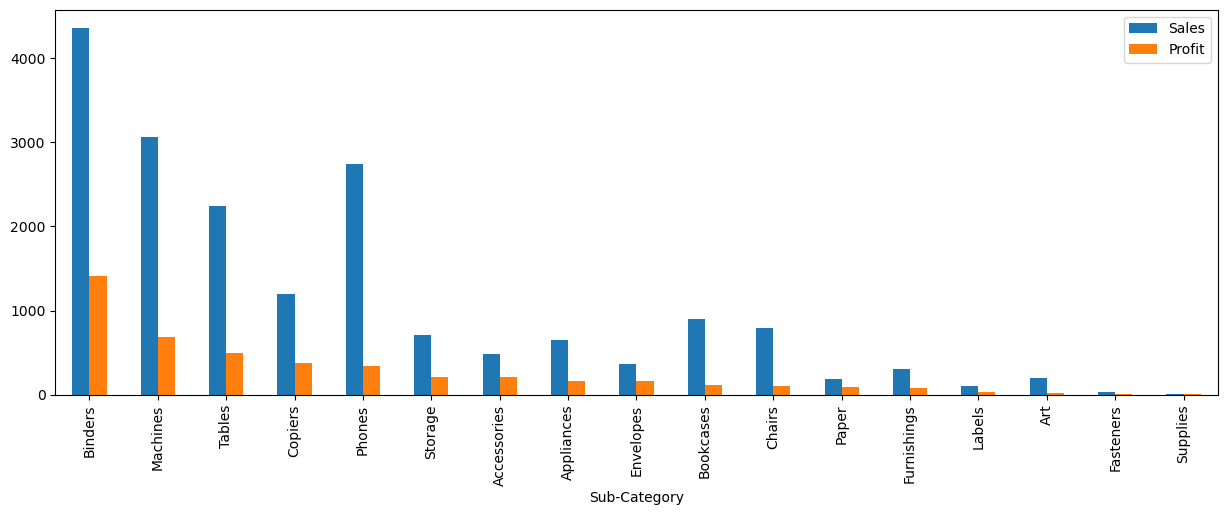

In [34]:
dfnew1 = pd.read_csv("['First Class'].csv")

x = dfnew1.groupby(['Sub-Category'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (15, 5))

<AxesSubplot:xlabel='Sub-Category'>

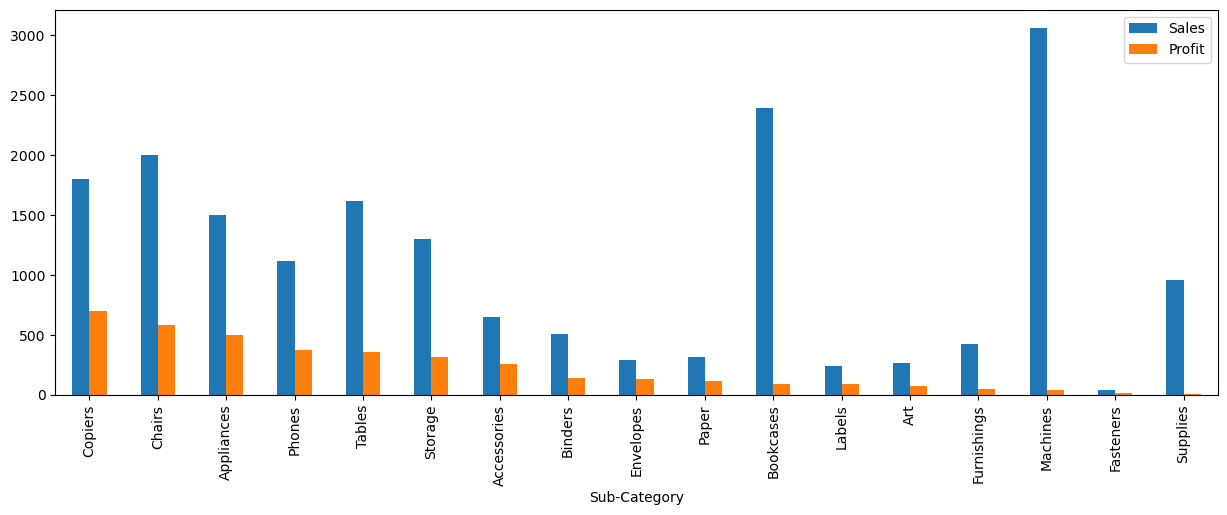

In [35]:
dfnew2 = pd.read_csv("['Second Class'].csv")

x = dfnew2.groupby(['Sub-Category'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (15, 5))

<AxesSubplot:xlabel='Sub-Category'>

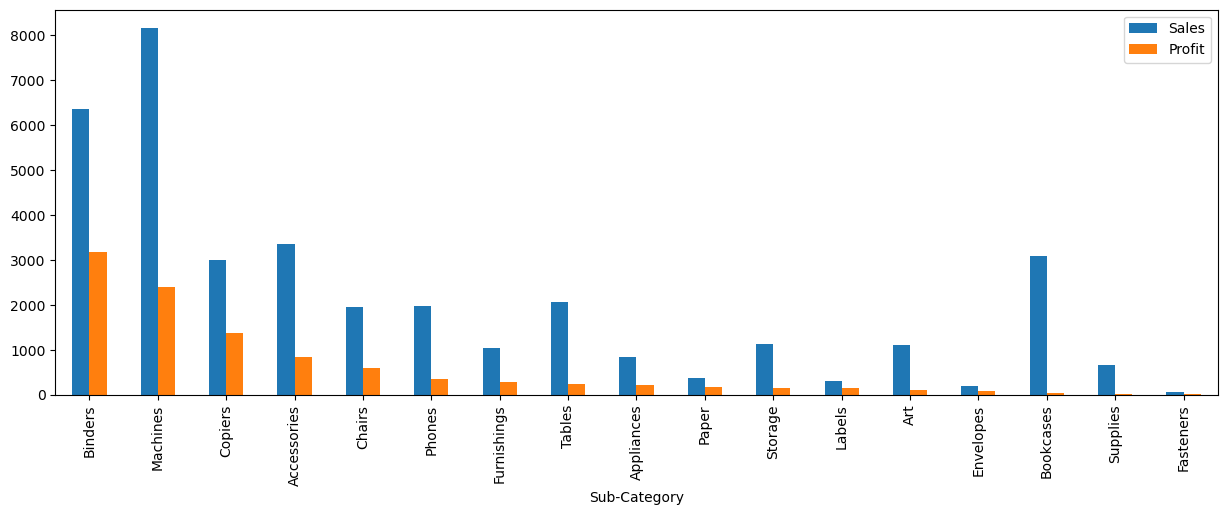

In [36]:
dfnew3 = pd.read_csv("['Standard Class'].csv")

x = dfnew3.groupby(['Sub-Category'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (15, 5))

<AxesSubplot:xlabel='Sub-Category'>

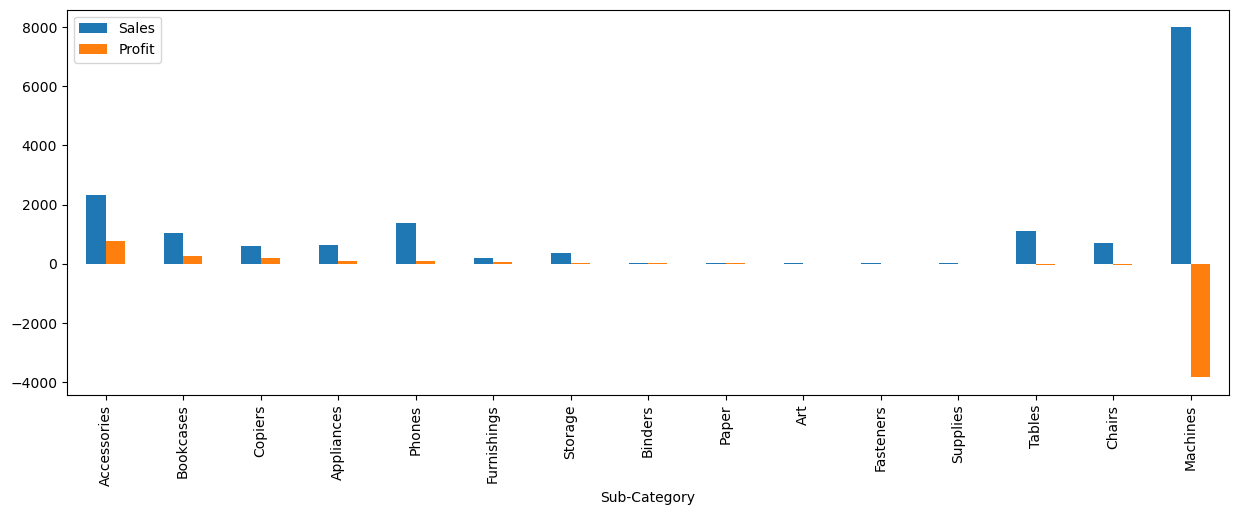

In [37]:
dfnew4 = pd.read_csv("['Same Day'].csv")

x = dfnew4.groupby(['Sub-Category'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (15, 5))

In [38]:
dfnew_ = df[['Ship Mode', 'State', 'Sales','Profit']]

for i in range (4):
    temp = dfnew_.loc[(df['Ship Mode_'] == i )]
    name = str(temp['Ship Mode'].unique())+ ".csv"
    temp.to_csv(name)

<AxesSubplot:xlabel='State'>

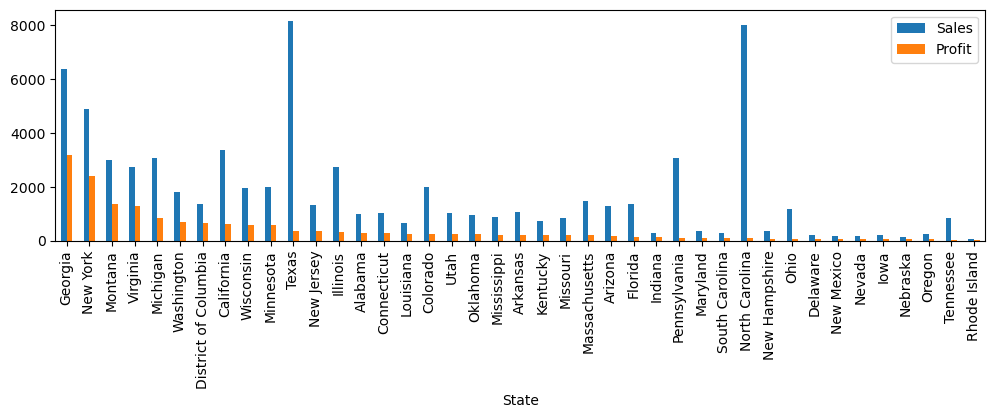

In [39]:
x = dfnew_.groupby(['State'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (12, 3))

<AxesSubplot:xlabel='State'>

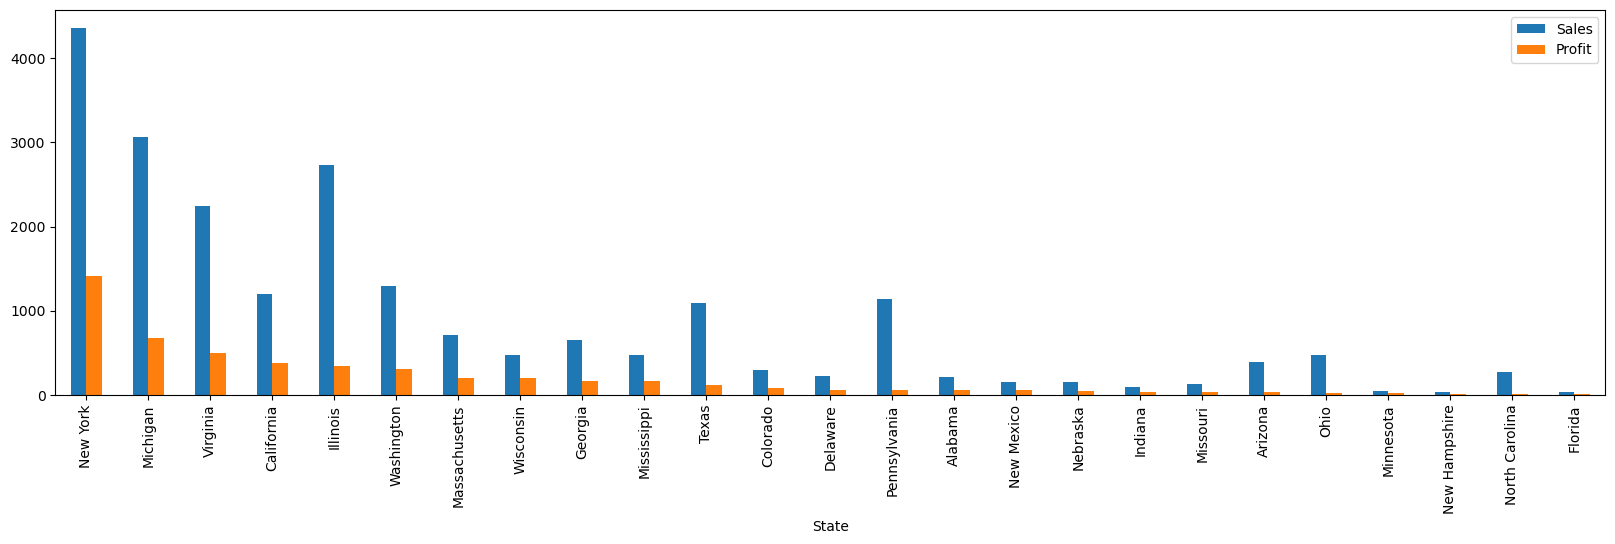

In [40]:
dfnew_1 = pd.read_csv("['First Class'].csv")
dfnew_1
x = dfnew_1.groupby(['State'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (20, 5))

<AxesSubplot:xlabel='State'>

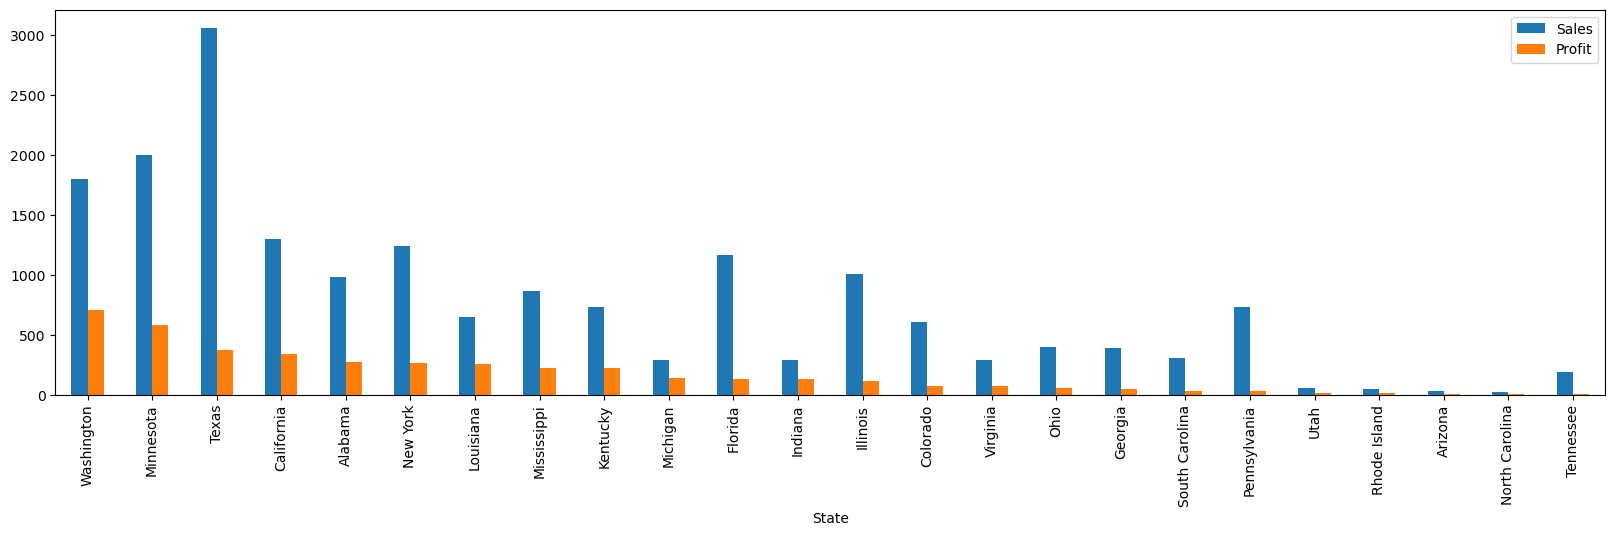

In [41]:
dfnew_2 = pd.read_csv("['Second Class'].csv")
dfnew_2
x = dfnew_2.groupby(['State'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (20, 5))

<AxesSubplot:xlabel='State'>

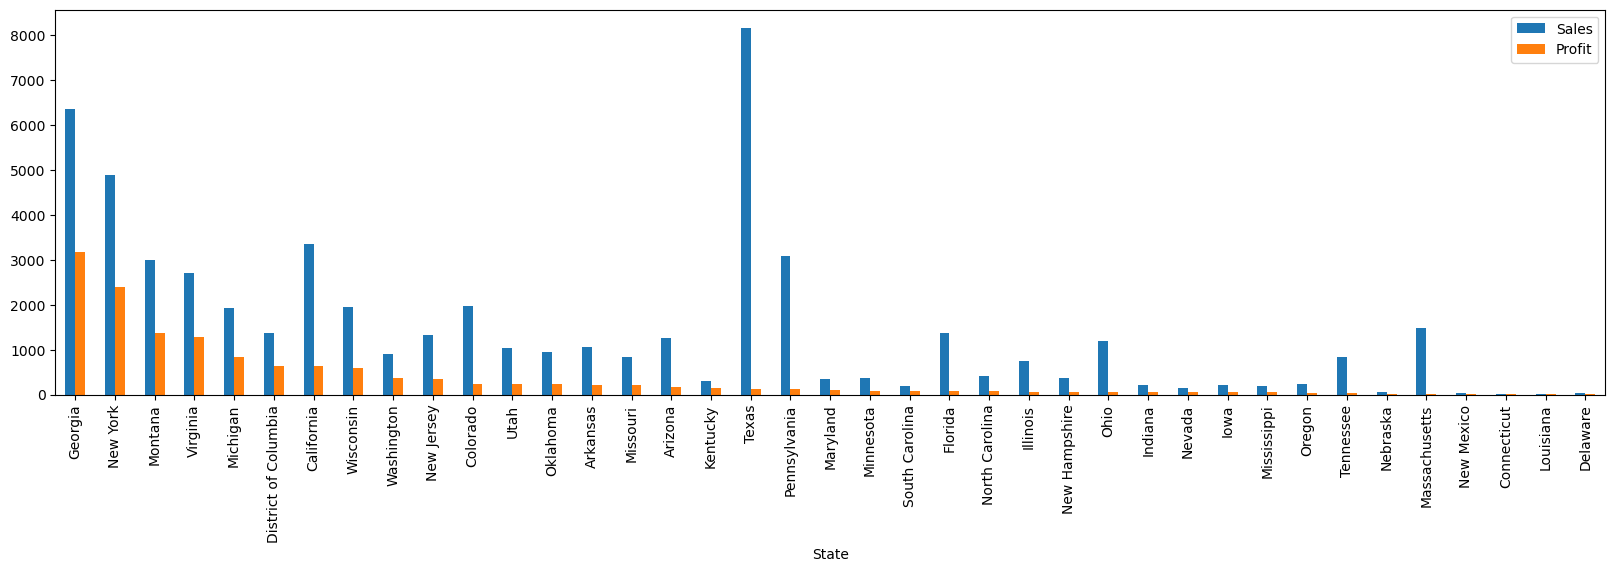

In [42]:
dfnew_3 = pd.read_csv("['Standard Class'].csv")
dfnew_3
x = dfnew_3.groupby(['State'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (20, 5))

<AxesSubplot:xlabel='State'>

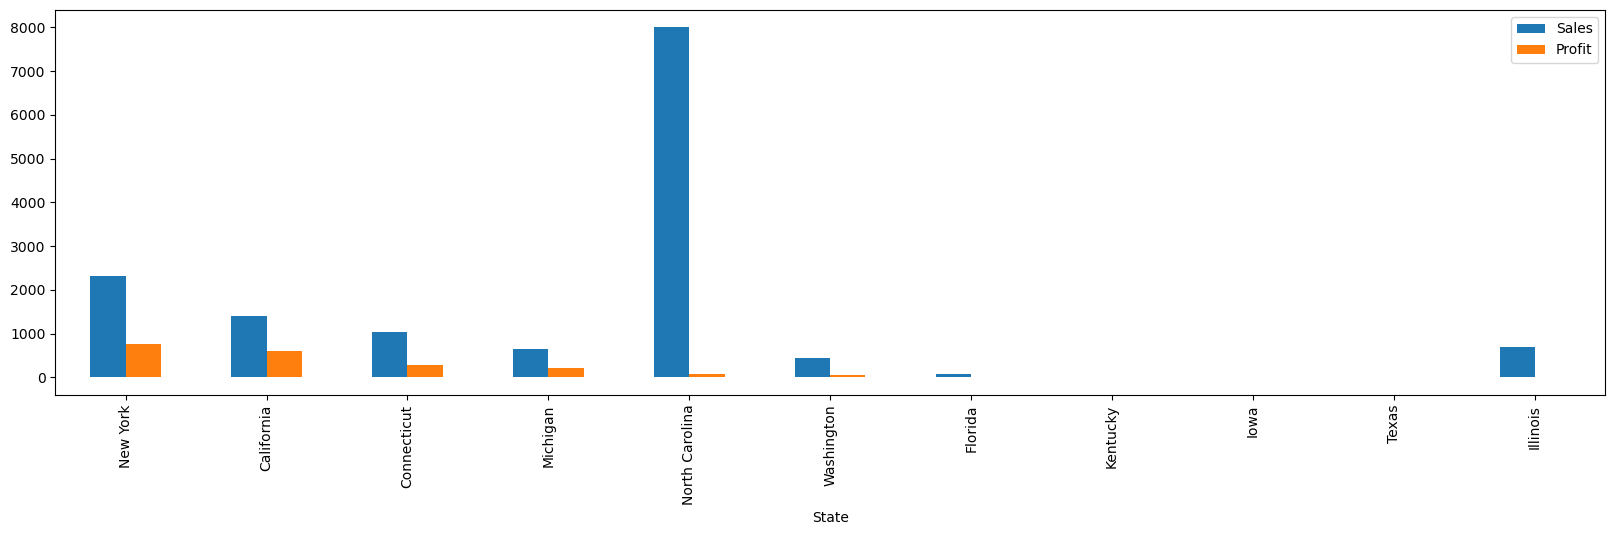

In [43]:
dfnew_4 = pd.read_csv("['Same Day'].csv")
dfnew_4
x = dfnew_4.groupby(['State'])[['Sales','Profit']].max()
x.sort_values('Profit', ascending = False)[['Sales', 'Profit']].plot(kind = 'bar', figsize = (20, 5))

In [44]:
dfnew__ = df[['Category','Category_' ,'Sub-Category','Profit']]

for i in range (3):
    temp = dfnew__.loc[(df['Category_'] == i )]
    name = str(temp['Category'].unique())+ ".csv"
    temp.to_csv(name)

array([[<AxesSubplot:title={'center':'Accessories'}>,
        <AxesSubplot:title={'center':'Appliances'}>,
        <AxesSubplot:title={'center':'Art'}>,
        <AxesSubplot:title={'center':'Binders'}>],
       [<AxesSubplot:title={'center':'Bookcases'}>,
        <AxesSubplot:title={'center':'Chairs'}>,
        <AxesSubplot:title={'center':'Copiers'}>,
        <AxesSubplot:title={'center':'Envelopes'}>],
       [<AxesSubplot:title={'center':'Fasteners'}>,
        <AxesSubplot:title={'center':'Furnishings'}>,
        <AxesSubplot:title={'center':'Labels'}>,
        <AxesSubplot:title={'center':'Machines'}>],
       [<AxesSubplot:title={'center':'Paper'}>,
        <AxesSubplot:title={'center':'Phones'}>,
        <AxesSubplot:title={'center':'Storage'}>,
        <AxesSubplot:title={'center':'Supplies'}>],
       [<AxesSubplot:title={'center':'Tables'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

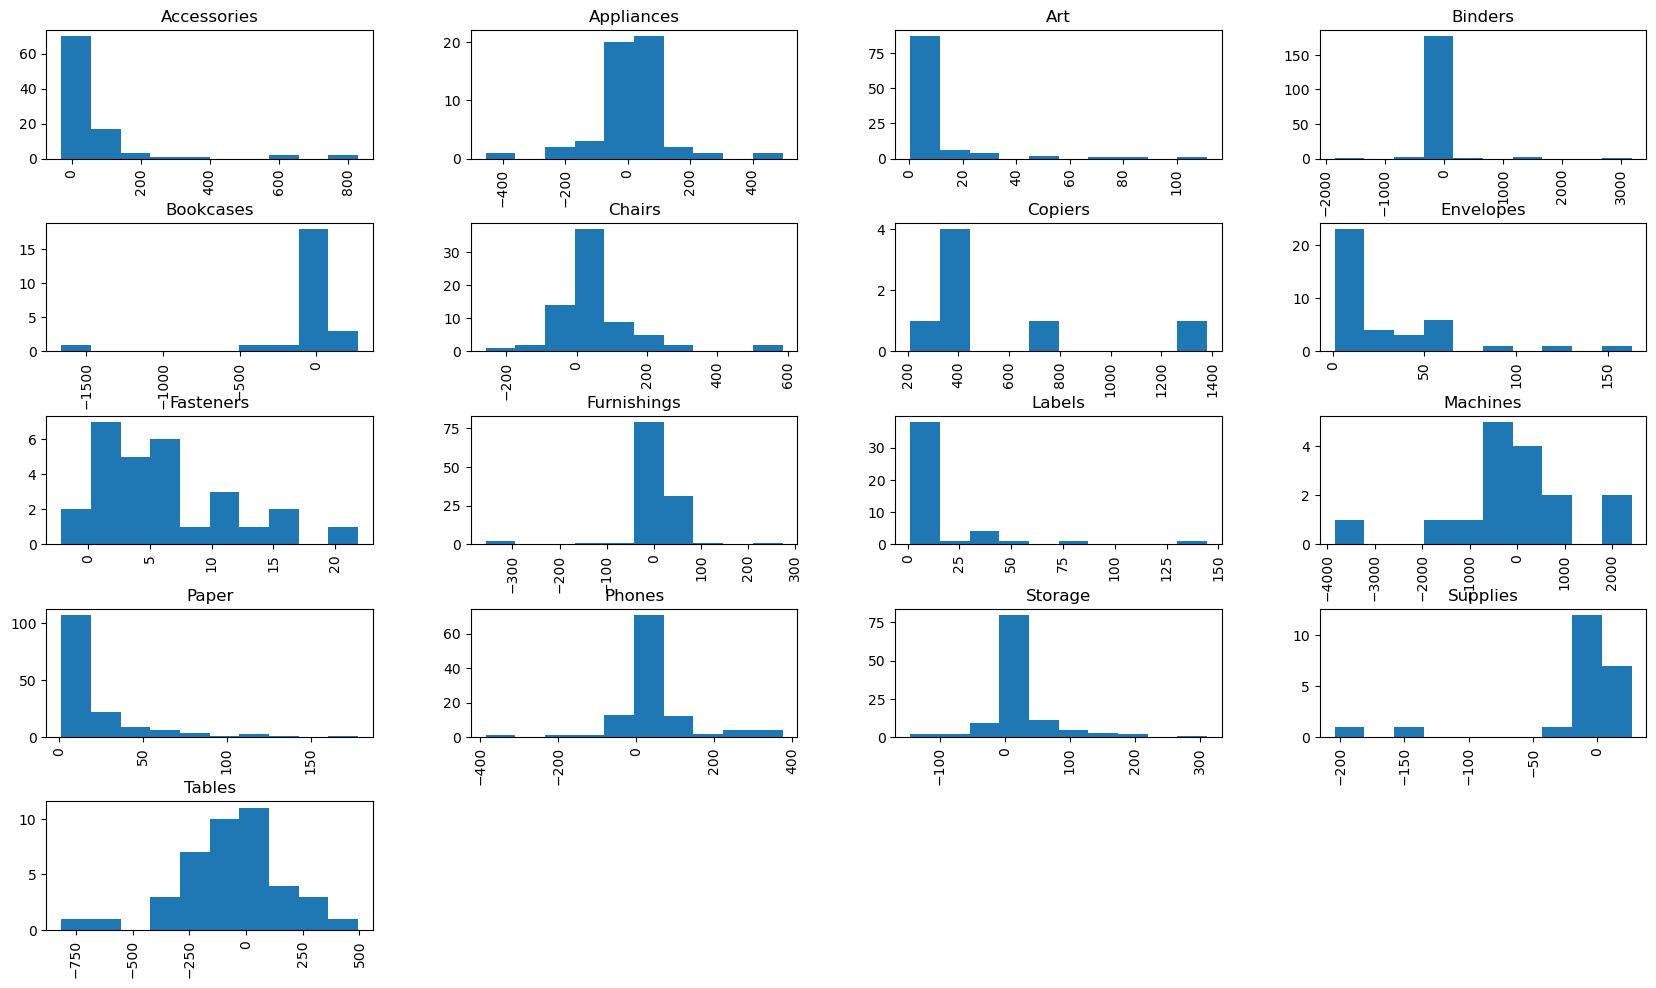

In [50]:
dfnew__['Profit'].hist(by=dfnew__['Sub-Category'], figsize = (20,12))


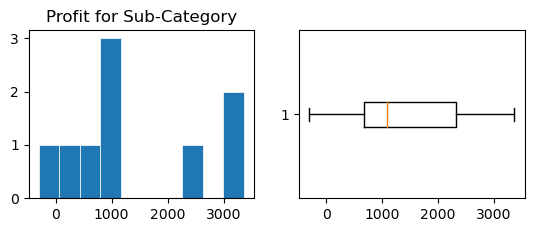

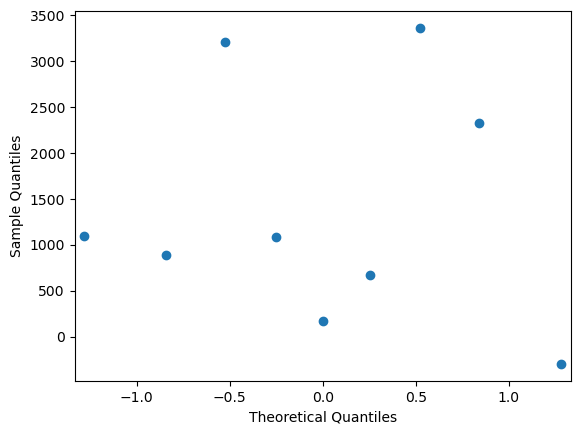

In [45]:
dfnew__1 = pd.read_csv("['Office Supplies'].csv")
x = pd.DataFrame(dfnew__1.groupby(['Sub-Category'])['Profit'].sum())

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Profit for Sub-Category')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()

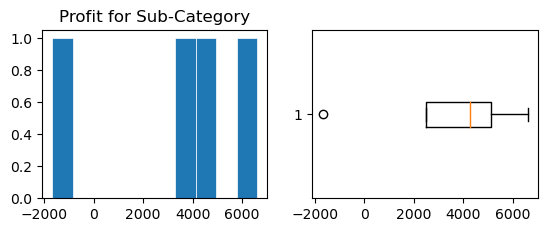

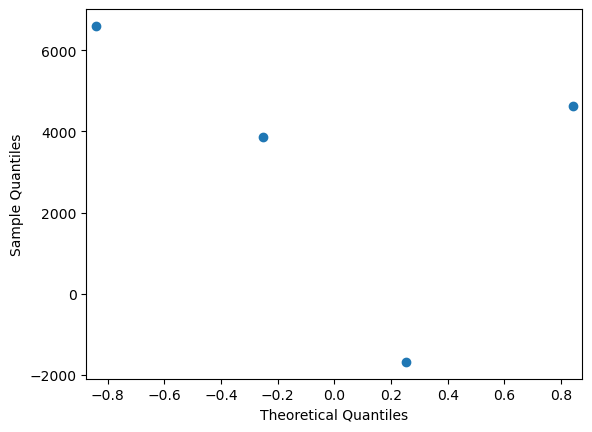

In [48]:
dfnew__1 = pd.read_csv("['Technology'].csv")
x = pd.DataFrame(dfnew__1.groupby(['Sub-Category'])['Profit'].sum())

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Profit for Sub-Category')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()

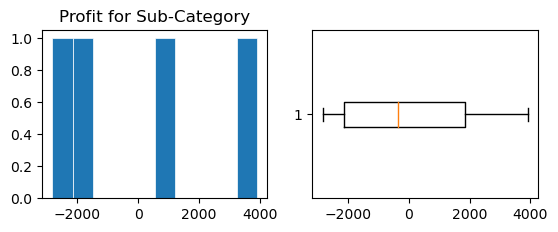

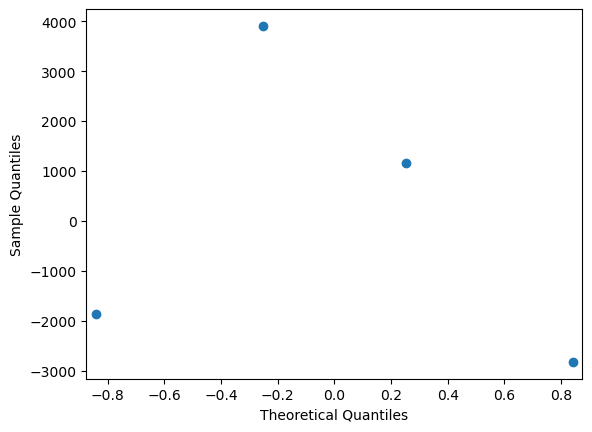

In [49]:
dfnew__1 = pd.read_csv("['Furniture'].csv")
x = pd.DataFrame(dfnew__1.groupby(['Sub-Category'])['Profit'].sum())

plt.subplot(2, 2, 1)
plt.hist(x, bins = 10,  linewidth=0.5, edgecolor="white")
plt.title('Profit for Sub-Category')

plt.subplot(2,2,2)
plt.boxplot(x, vert=False)

sm.qqplot(x)

plt.show()